<img src="https://media.licdn.com/dms/image/sync/v2/D4D27AQGyl-Kmt9JN9g/articleshare-shrink_800/articleshare-shrink_800/0/1712056202313?e=2147483647&v=beta&t=JFpqJk6uvDe4uupSKXy5aTRzFWU6dLiXHuUe1zpg5-c" alt="Business Graph" title="Business Graph" width="100%">

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Cleaning:

In [2]:
airline_dealy_df = pd.read_csv('Desktop/Airline Delay Cause.csv')
airline_dealy_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [3]:
print("=" * 50)
print("AIRLINE DELAY DATASET OVERVIEW".center(50))
print("=" * 50)
airline_dealy_df.info()
print("=" * 50)

          AIRLINE DELAY DATASET OVERVIEW          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted     

In [4]:
print(airline_dealy_df.shape)

(318017, 21)


In [5]:
print("=" * 50)
print("MISSING VALUES IN AIRLINE DELAY DATASET".center(50))
print("=" * 50)
print(airline_dealy_df.isnull().sum())
print("=" * 50)

     MISSING VALUES IN AIRLINE DELAY DATASET      
year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64


##### The dataset contains missing values across several columns:

- Carrier Information: 4 missing values in carrier and carrier_name.

- Airport Information: 3 missing values in airport.

- Flight Data: Missing values range from 488 to 732 in columns such as arr_flights, arr_del15, and other delay/cancellation metrics.

In [6]:
airline_dealy_df['carrier'].fillna(airline_dealy_df['carrier'].mode()[0], inplace=True)
airline_dealy_df['carrier_name'].fillna(airline_dealy_df['carrier_name'].mode()[0], inplace=True)
airline_dealy_df['airport'].fillna(airline_dealy_df['airport'].mode()[0], inplace=True)

columns_with_zero = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 
                             'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 
                             'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
                             'security_delay', 'late_aircraft_delay']

airline_dealy_df[columns_with_zero] = airline_dealy_df[columns_with_zero].fillna(0)

print(airline_dealy_df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [7]:
airline_dealy_df.isnull().values.any()

False

##### All missing values in the dataset have been resolved:

- Categorical columns (carrier, carrier_name, airport) were filled with their most frequent values (mode).

- Numerical columns related to flight delays and cancellations were filled with 0, indicating no events where data was missing.

###### After this process, the dataset contains no missing values, making it ready for analysis.

In [8]:
# Keeping the cleaned datasets to be used for analysis
airline_cleaned_df = airline_dealy_df
airline_cleaned_df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0
318016,2003,6,DL,Delta Air Lines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",3466.0,454.0,121.15,7.61,...,1.0,102.33,9.0,0.0,16853.0,5384.0,306.0,5686.0,28.0,5449.0


In [9]:
# Combine 'year' and 'month' columns
airline_cleaned_df['date'] = pd.to_datetime(airline_cleaned_df[['year', 'month']].assign(day=1))

# Set 'date' as the index for time-series analysis
airline_cleaned_df.set_index('date', inplace=True)

## Exploratory Data Analysis (EDA):

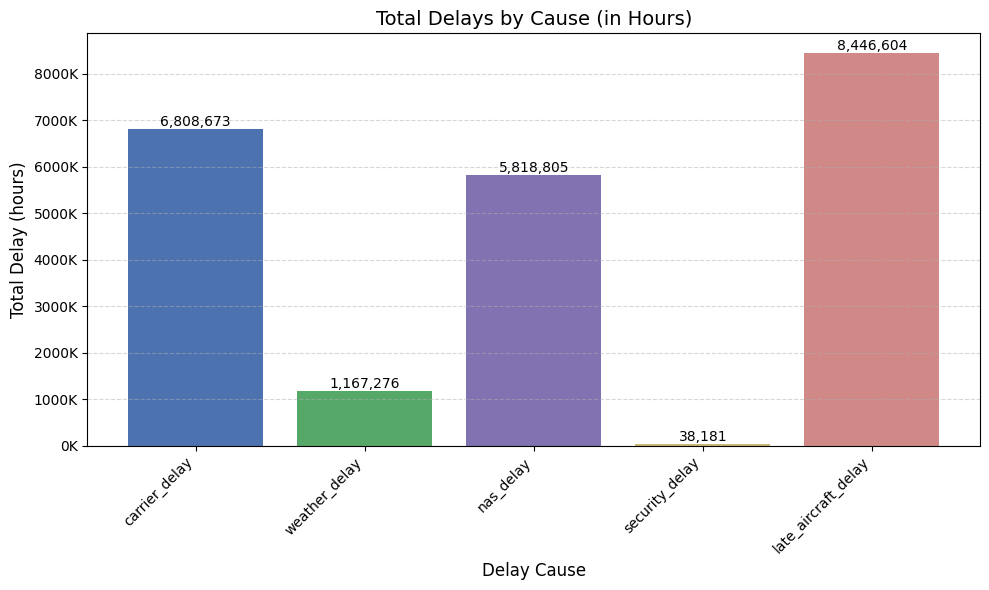

In [10]:
total_delays_hours = airline_cleaned_df[['carrier_delay', 'weather_delay', 'nas_delay', 
                                      'security_delay', 'late_aircraft_delay']].sum() / 60

colors = ['#4c72b0', '#55a868', '#8172b2', '#ccb974', '#d08987']

plt.figure(figsize=(10, 6))
bars = plt.bar(total_delays_hours.index, total_delays_hours, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.title('Total Delays by Cause (in Hours)', fontsize=14)
plt.xlabel('Delay Cause', fontsize=12)
plt.ylabel('Total Delay (hours)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

- Late Aircraft Delays are the largest contributor, with over 8.4 million hours of delays, indicating that delays from earlier flights have a significant impact on subsequent flights.


- Carrier Delays are the second highest, totaling around 6.8 million hours, suggesting that issues within the airline’s operations (e.g., maintenance, crew availability) are also a major factor.


- NAS Delays (National Aviation System delays) contribute approximately 5.8 million hours, reflecting delays due to air traffic control, airport operations, etc.


- Weather Delays are much lower, with 1.1 million hours, showing less impact compared to other factors.


- Security Delays have the least impact, with only 38,181 hours, indicating minimal disruptions caused by security-related issues.

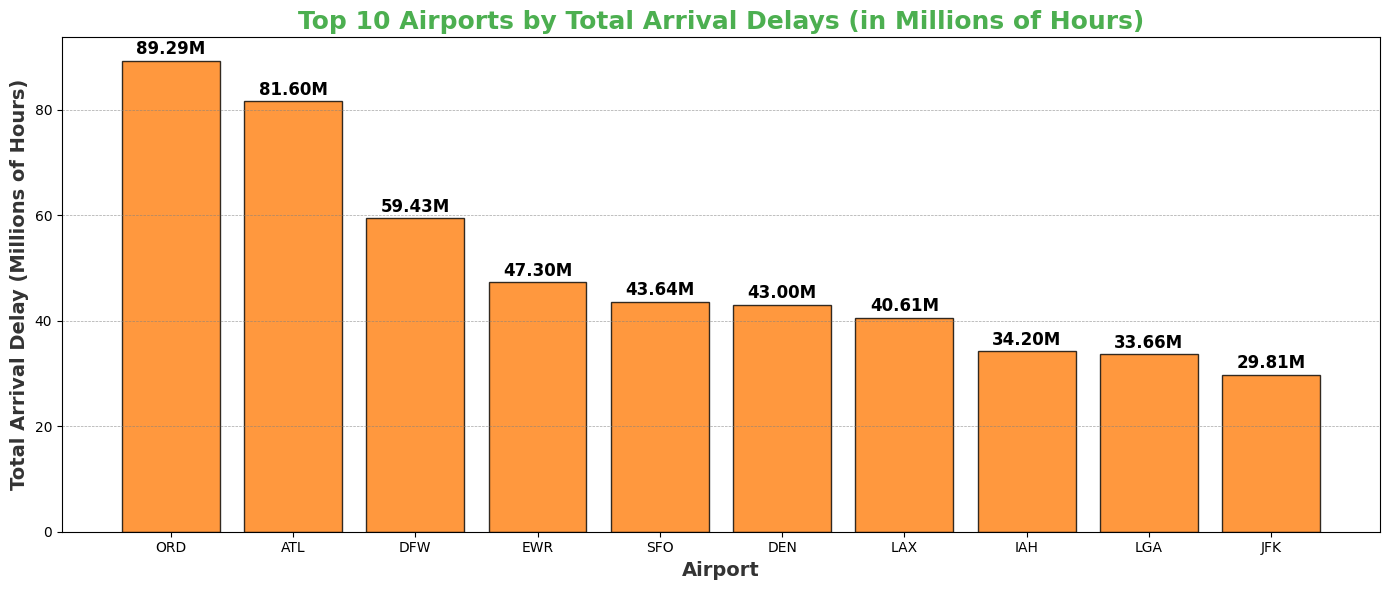

In [11]:
top_airports = airline_cleaned_df.groupby('airport_name')['arr_delay'].sum().nlargest(10).reset_index()

top_airports['airport_name'] = ['ORD', 'ATL', 'DFW', 'EWR', 'SFO', 'DEN', 'LAX', 'IAH', 'LGA', 'JFK']

plt.figure(figsize=(14, 6))
bars = plt.bar(top_airports['airport_name'], top_airports['arr_delay'] / 1e6, color='#FF7F0E', alpha=0.8, edgecolor='black')

plt.title('Top 10 Airports by Total Arrival Delays (in Millions of Hours)', fontsize=18, fontweight='bold', color='#4CAF50')
plt.xlabel('Airport', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Total Arrival Delay (Millions of Hours)', fontsize=14, fontweight='bold', color='#333333')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}M', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.grid(True, axis='y', which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

- Chicago O'Hare (ORD) has the highest total delays, with 89.29 million hours. This suggests significant congestion and operational issues.


- Atlanta (ATL) comes next, with 81.60 million hours of delays, showing it’s also a major hub for disruptions.


- Dallas/Fort Worth (DFW) and Newark (EWR) face substantial delays, at 59.43 million and 47.30 million hours, respectively.


- San Francisco (SFO) and Denver (DEN) both have around 43 million hours of delays, likely due to weather and other operational challenges.


- New York (JFK) has the lowest delays among the top 10 airports, but still faces 29.81 million hours of delays overall.

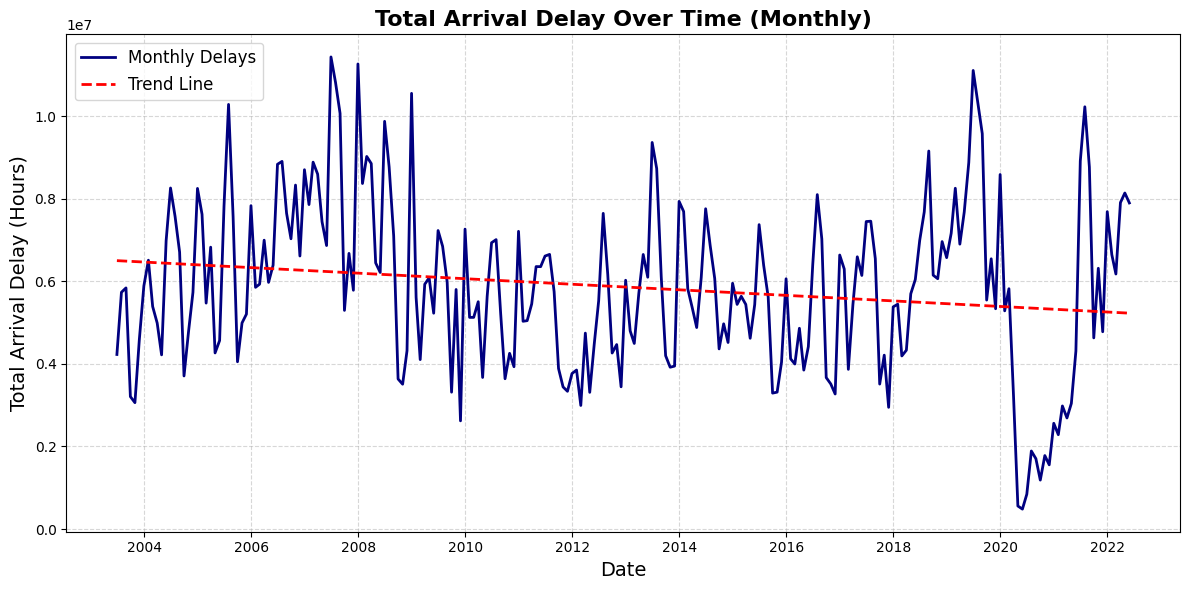

In [12]:
monthly_delays = airline_cleaned_df['arr_delay'].resample('M').sum()

ordinal_index = monthly_delays.index.map(lambda x: x.toordinal())

z = np.polyfit(ordinal_index, monthly_delays.values, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 6))
plt.plot(monthly_delays.index, monthly_delays, 
         color='navy', linestyle='-', linewidth=2, label='Monthly Delays')

plt.plot(monthly_delays.index, p(ordinal_index), 
         color='red', linestyle='--', linewidth=2, label='Trend Line')

plt.title('Total Arrival Delay Over Time (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Arrival Delay (Hours)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()

- High Variability: The total arrival delay fluctuates significantly from month to month, indicating periods of both severe and moderate delays.


- Overall Trend: The red dashed trend line shows a slight downward trend, suggesting that delays have generally decreased over the long term.


- Recent Surge: Despite the overall downward trend, there is a noticeable increase in delays around 2020-2021, possibly due to disruptions like the COVID-19 pandemic.


- Peaks and Troughs: The peaks represent months with exceptionally high delays, while troughs indicate periods with reduced delays, possibly influenced by seasonal patterns or operational improvements.

In [13]:
airline_cleaned_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000,318017.000000
mean,2012.450957,6.497844,381.174843,72.737266,21.040547,2.612343,23.968392,0.178762,24.937409,7.196197,0.866337,4203.449416,1284.586777,220.229079,1097.829204,7.203728,1593.613819
std,5.678296,3.459423,1026.470137,198.738380,47.641889,9.961427,85.053618,0.844214,75.223798,37.188806,3.912903,12510.392538,3513.060853,860.903471,4633.117074,38.825771,4921.567074
min,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.660000,0.000000,1.620000,0.000000,0.000000,433.000000,147.000000,0.000000,56.000000,0.000000,78.000000
50%,2012.000000,6.000000,120.000000,22.000000,8.170000,0.580000,5.470000,0.000000,5.850000,1.000000,0.000000,1198.000000,436.000000,25.000000,202.000000,0.000000,350.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.660000,2.000000,15.330000,0.000000,17.000000,4.000000,1.000000,3075.000000,1099.000000,159.000000,601.000000,0.000000,1107.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


## Feature Engineering :

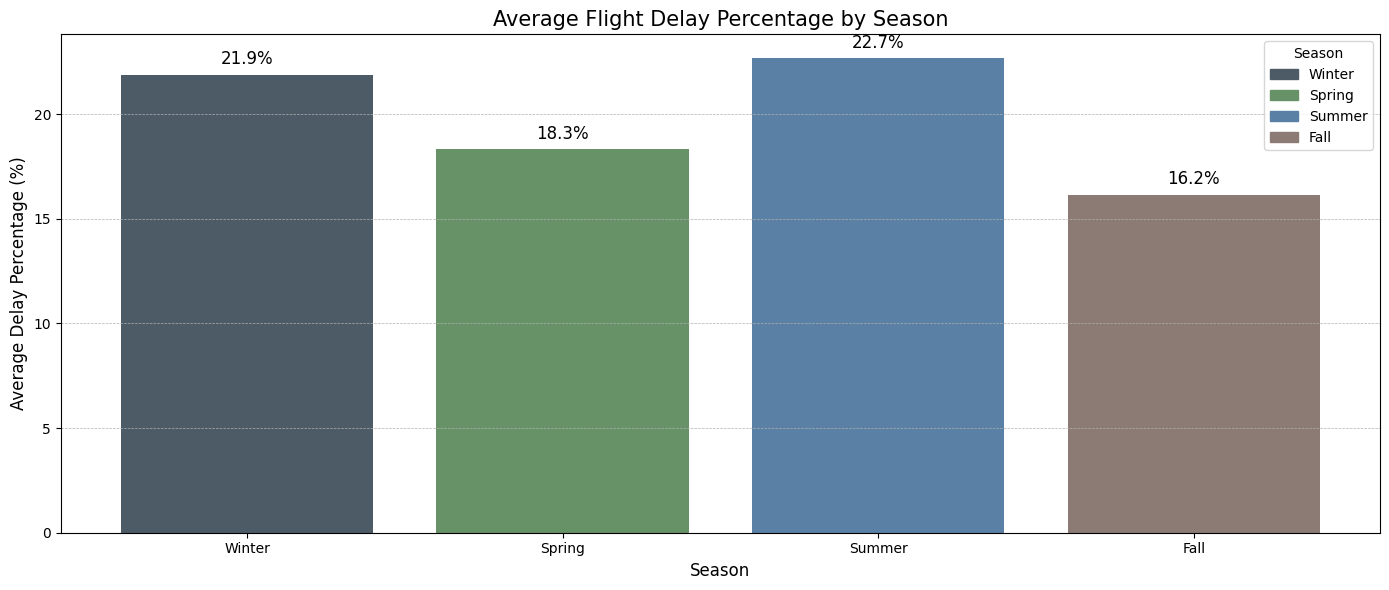

In [14]:
airline_cleaned_df['delay_ratio'] = (airline_cleaned_df['arr_del15'] / airline_cleaned_df['arr_flights']) * 100
airline_cleaned_df = airline_cleaned_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['delay_ratio'])

# Assign 'season' based on the month
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer',
              9: 'Fall', 10: 'Fall', 11: 'Fall'}
airline_cleaned_df['season'] = airline_cleaned_df['month'].map(season_map)

seasonal_delay_ratio = (airline_cleaned_df.groupby('season')['delay_ratio']
                        .mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']))

plt.figure(figsize=(14, 6))
colors = {'Winter': '#4d5b66', 'Spring': '#679267', 'Summer': '#5b80a5', 'Fall': '#8c7b75'}
bars = plt.bar(seasonal_delay_ratio.index, seasonal_delay_ratio, 
               color=[colors[season] for season in seasonal_delay_ratio.index])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{bar.get_height():.1f}%', ha='center', fontsize=12)

plt.title('Average Flight Delay Percentage by Season', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Delay Percentage (%)', fontsize=12)
plt.legend([plt.Rectangle((0,0),1,1, color=colors[season]) for season in colors], 
           colors.keys(), title='Season', loc='upper right')

plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

- 22.7% of flights are delayed during summer, making it the peak season for delays.



- Delays occur in 21.9% of flights during winter, likely due to weather challenges like snow and ice.



- The delay percentage drops to 18.3%, suggesting that operational factors may be better managed during spring.



- Only 16.2% of flights are delayed in fall, indicating more stable operations and fewer disruptions.

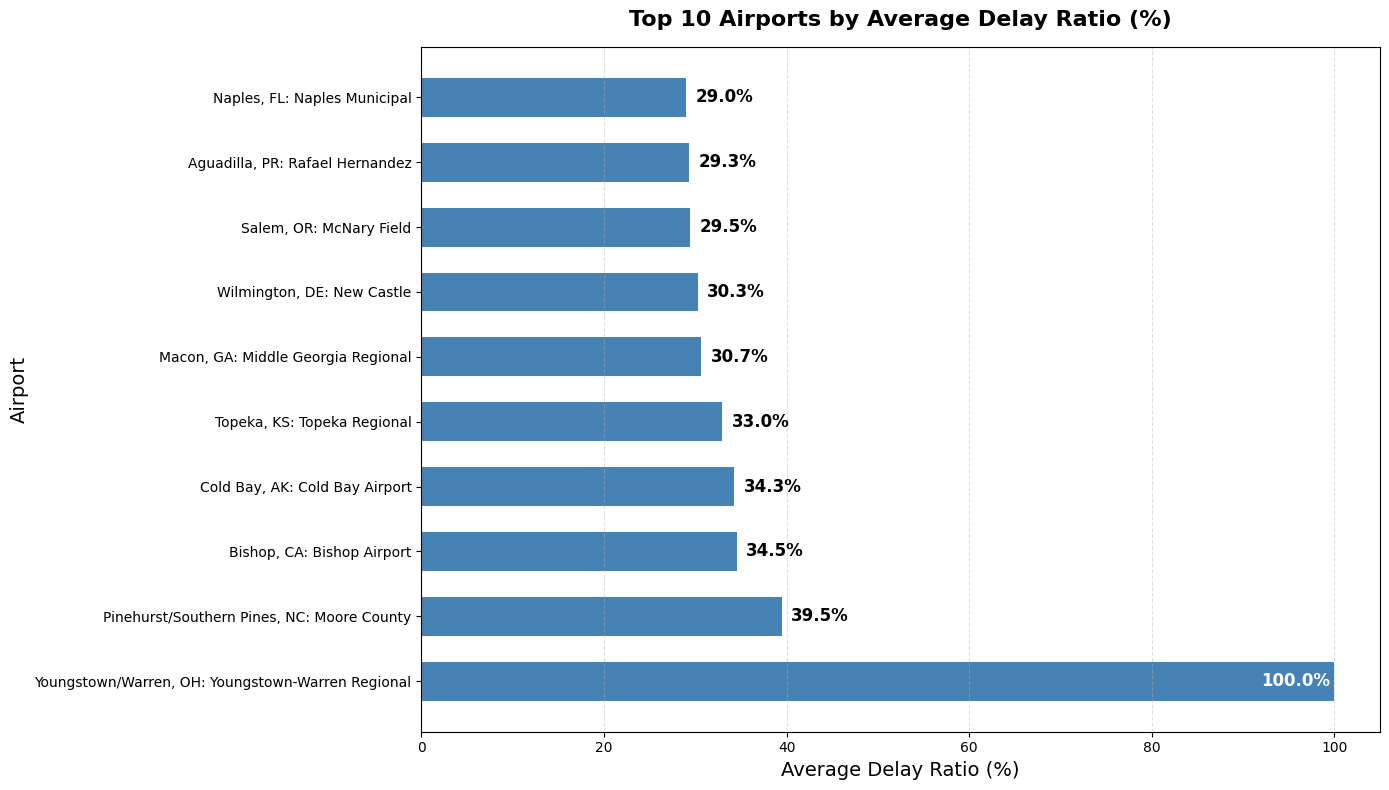

In [15]:
airport_delay_ratio = (airline_cleaned_df.groupby('airport_name')['delay_ratio']
                       .mean().nlargest(10).reset_index())

color = '#4682b4'

plt.figure(figsize=(14, 8))
bars = plt.barh(airport_delay_ratio['airport_name'], airport_delay_ratio['delay_ratio'], 
                color=color, height=0.6)

for bar in bars:
    label_color = 'white' if bar.get_width() == 100 else 'black'
    label_x_pos = bar.get_width() - 8 if bar.get_width() == 100 else bar.get_width() + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%', 
             va='center', fontsize=12, color=label_color, weight='bold')

plt.title('Top 10 Airports by Average Delay Ratio (%)', fontsize=16, weight='bold', pad=15)
plt.xlabel('Average Delay Ratio (%)', fontsize=14)
plt.ylabel('Airport', fontsize=14)

plt.subplots_adjust(right=0.85)

plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

## Statistical Analysis - Correlation Matrix :

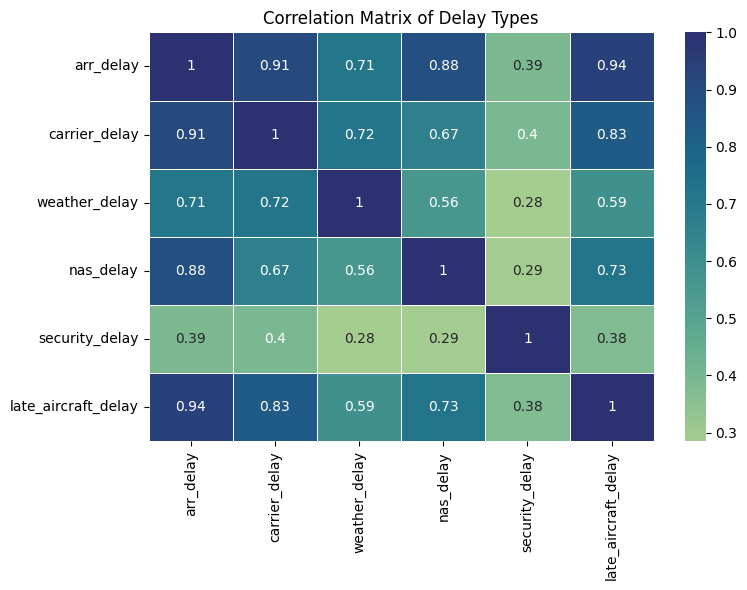

In [16]:
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
correlation_matrix = airline_cleaned_df[delay_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix of Delay Types')
plt.tight_layout()
plt.show()

1. Late Aircraft Delay vs. Arrival Delay:

    - Strong correlation (0.94), indicating that late aircraft issues are the primary driver of overall arrival delays.
    
    
2. Carrier Delay vs. Arrival Delay:

    - High correlation (0.91), showing that delays within airline operations significantly impact total arrival delays.
    
    
3. NAS Delay and Arrival Delay:

    - Moderate correlation (0.88), suggesting that air traffic management and airport operations contribute notably to arrival delays.
    
    
4. Weather Delay vs. Arrival Delay:

    - Moderate correlation (0.71), indicating that weather conditions moderately influence overall delays, but not as strongly as other factors.
    
    
5. Security Delays:


   - Low correlation (below 0.4) with other delays, implying minimal impact on total delays.
    
    
6. Carrier Delay vs. Late Aircraft Delay:


   - High correlation (0.83), suggesting that carrier operational issues often lead to late aircraft delays, creating a chain effect.

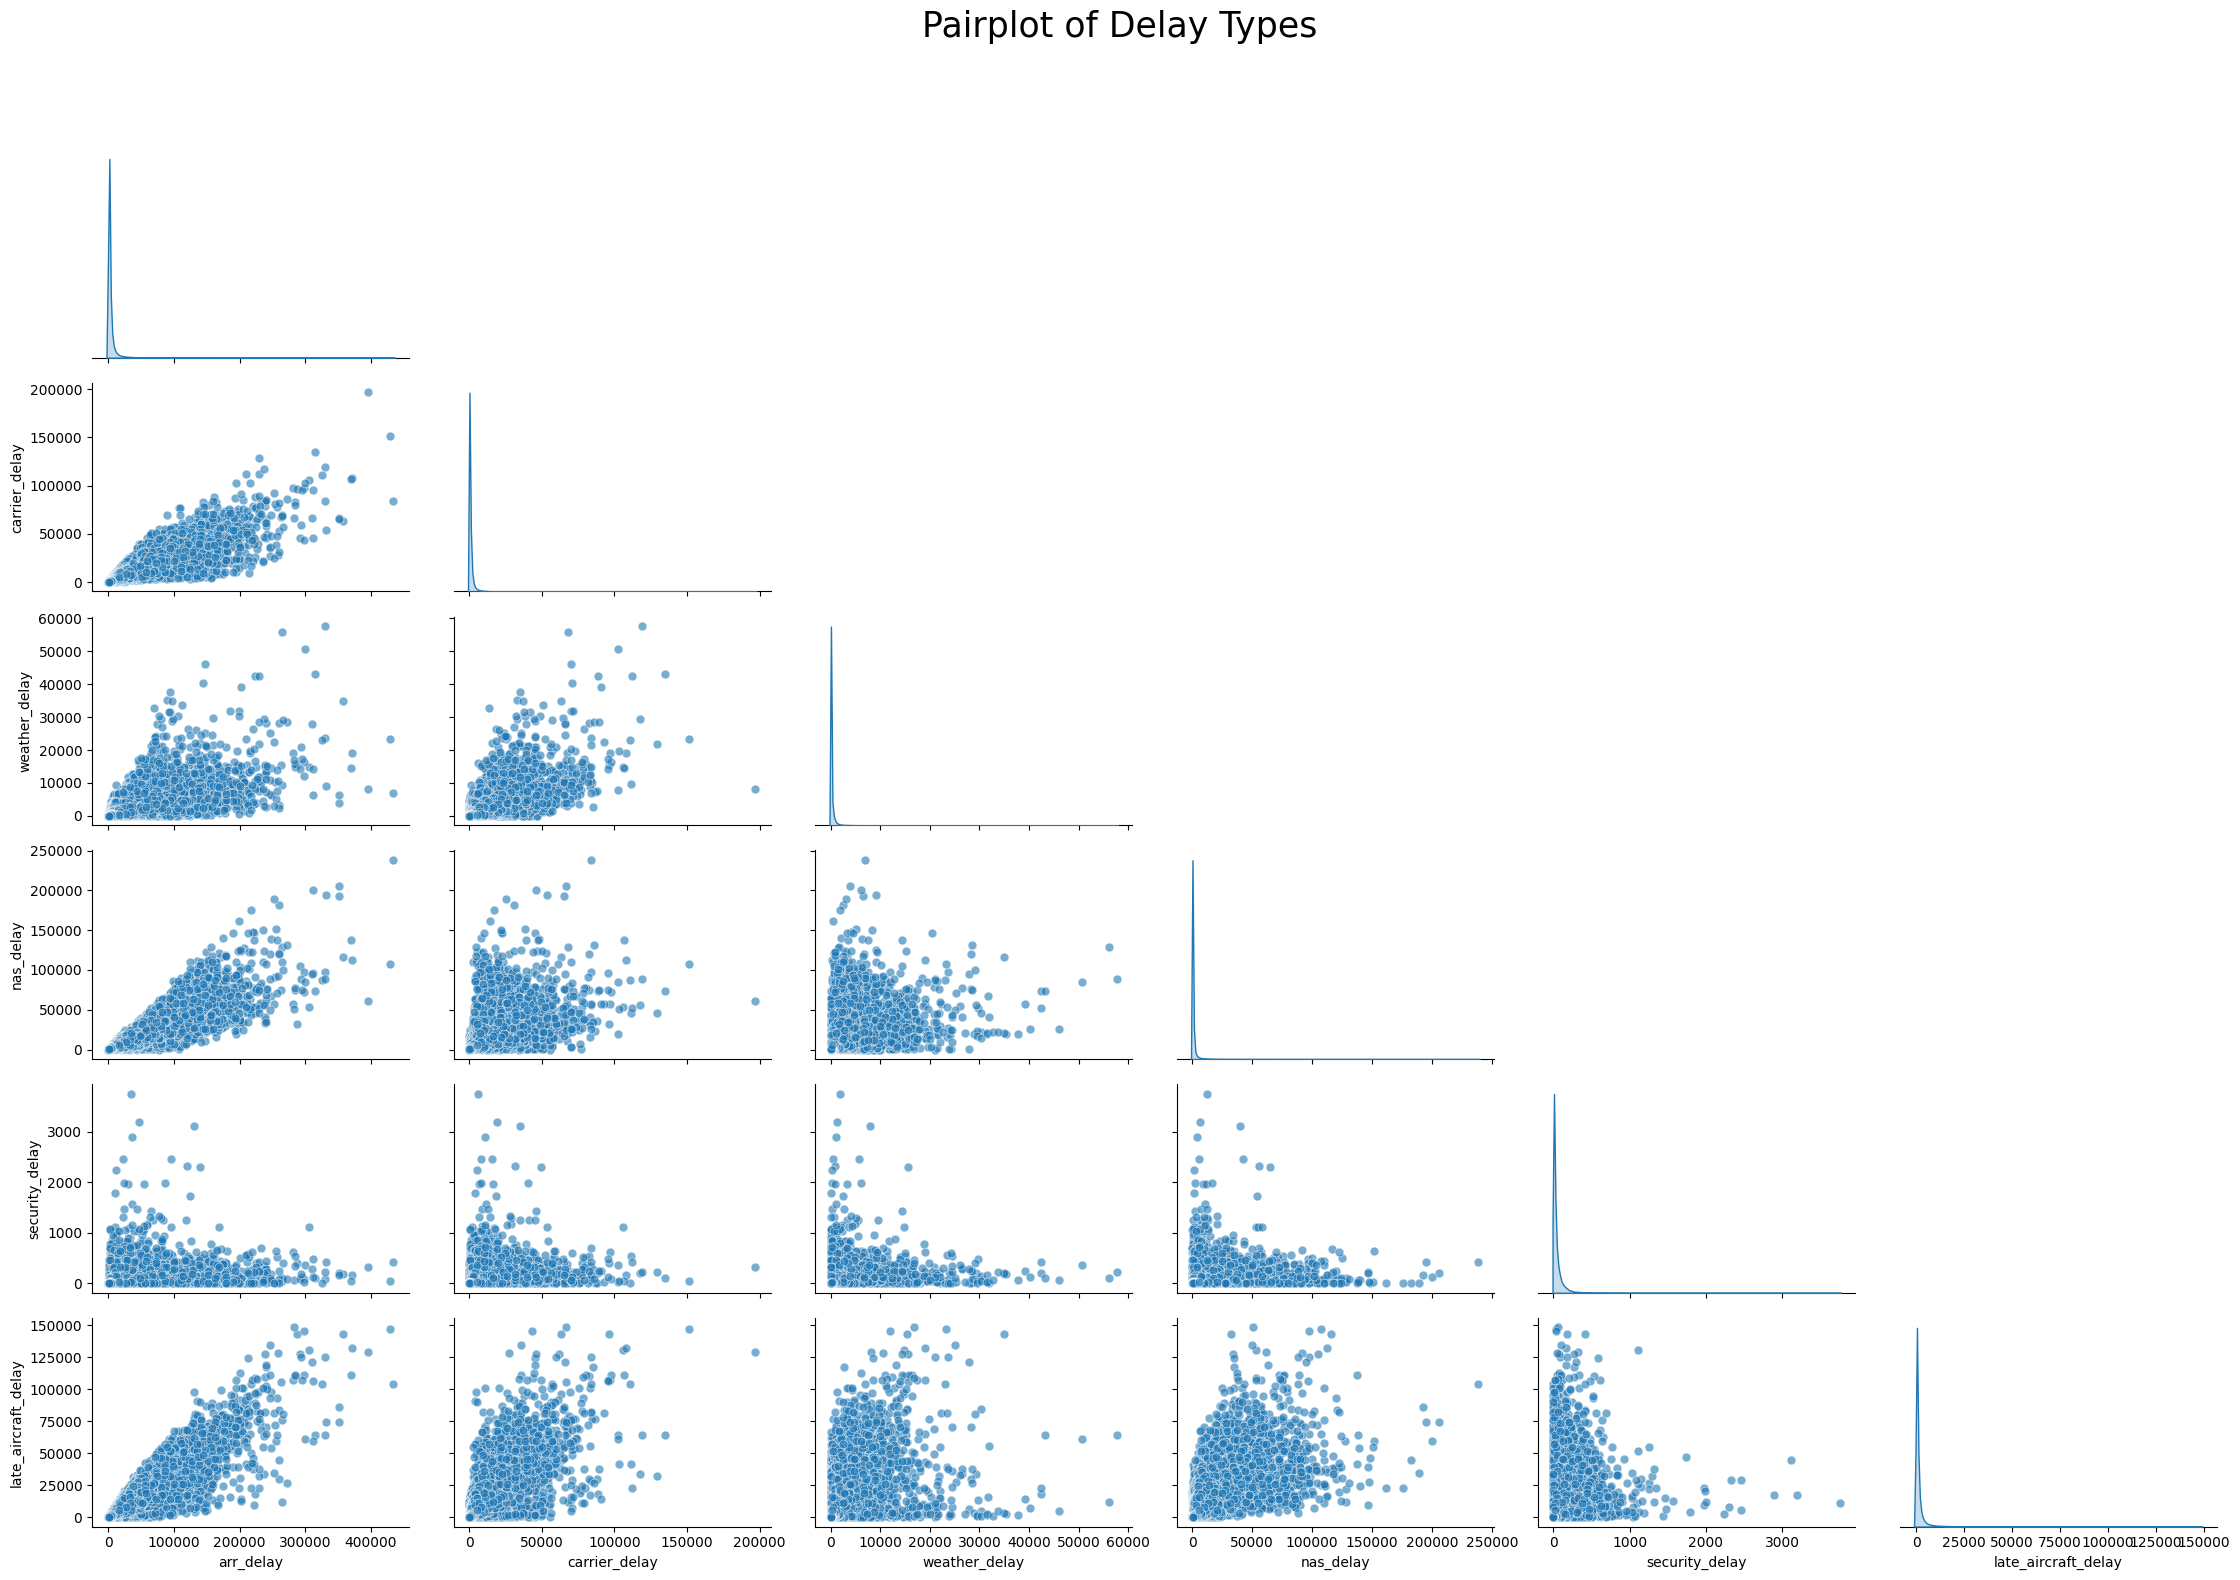

In [17]:
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
                 'security_delay', 'late_aircraft_delay']

sns.pairplot(airline_cleaned_df[delay_columns], corner=True, 
             diag_kind='kde', height=2.5, aspect=1.5,  
             plot_kws={'alpha': 0.6, 's': 40},  
             palette='coolwarm')

plt.suptitle('Pairplot of Delay Types', fontsize=25, y=1.05)
plt.tight_layout()
plt.show()

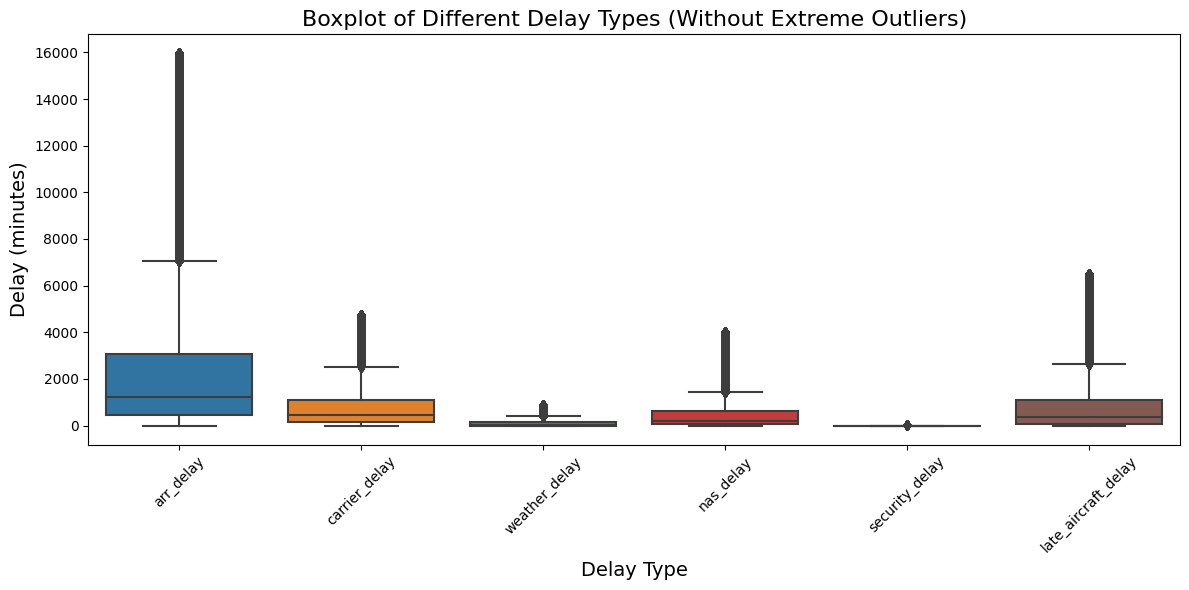

In [18]:
# Calculate the 95th percentile for each column
quantile_95 = airline_cleaned_df[['arr_delay', 'carrier_delay', 'weather_delay',
                                  'nas_delay', 'security_delay', 'late_aircraft_delay']].quantile(0.95)

filtered_df = airline_cleaned_df[['arr_delay', 'carrier_delay', 'weather_delay',
                                  'nas_delay', 'security_delay', 'late_aircraft_delay']].clip(upper=quantile_95, axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df)
plt.title('Boxplot of Different Delay Types (Without Extreme Outliers)', fontsize=16)
plt.xlabel('Delay Type', fontsize=14)
plt.ylabel('Delay (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Arrival Delay**:
  - Shows the widest range and highest median, indicating that arrival delays have a substantial spread, often exceeding other delay types.
  

- **Carrier Delay**:
  - Exhibits a high median and wide spread, reflecting frequent variations and occasional extreme delays caused by airline operations (e.g., maintenance, crew issues).
  

- **NAS Delay (National Aviation System)**:
  - Has a moderate spread with a relatively high median, indicating significant delays stemming from air traffic control, runway congestion, or other operational factors.
  

- **Weather Delay**:
  - Generally has a lower median and smaller spread, suggesting that while weather impacts delays, it results in less variation compared to other types.
  

- **Security Delay**:
  - Shows the smallest spread and median, indicating minimal disruption overall and little variation in delays.
  

- **Late Aircraft Delay**:
  - Displays a high median and wide spread, highlighting its major impact and tendency to generate prolonged delays, often influenced by cascading delays from previous flights.

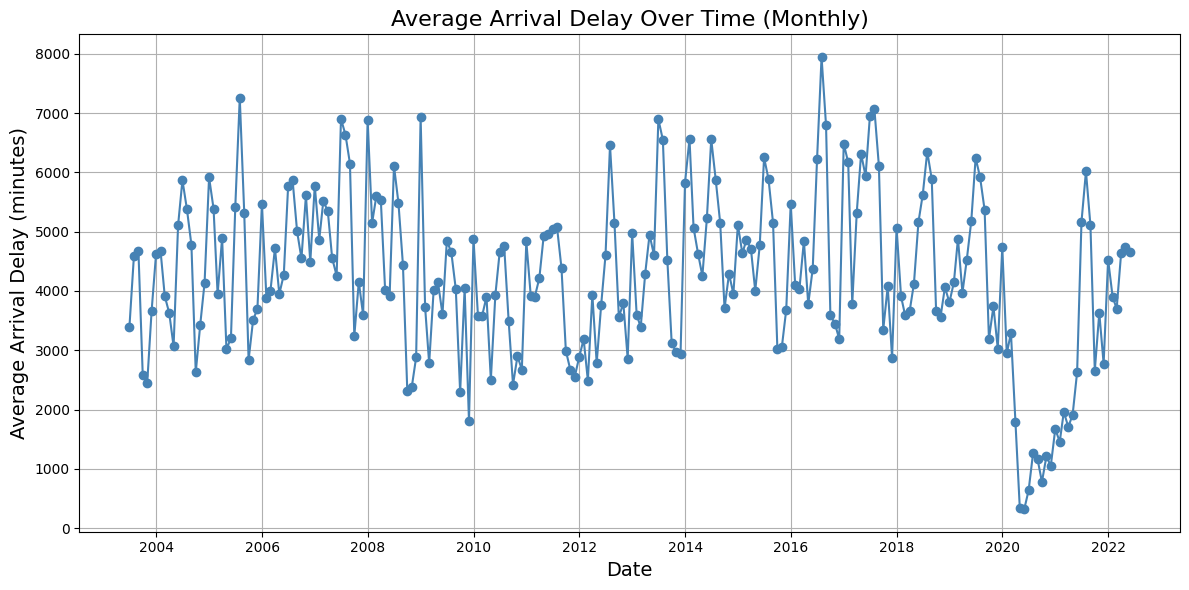

In [19]:
# Create a 'date' column from 'year' and 'month'
airline_cleaned_df['date'] = pd.to_datetime(airline_cleaned_df[['year', 'month']].assign(day=1))
monthly_delay = airline_cleaned_df.resample('M', on='date')['arr_delay'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_delay.index, monthly_delay, marker='o', linestyle='-', color='steelblue')
plt.title('Average Arrival Delay Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

  - Over the years, the average arrival delay has shown a general upward trend, peaking between 2005-2007 and again around 2018. This suggests that delays have become more frequent or longer in recent years.


  - The chart demonstrates significant fluctuations in average delays, with several spikes exceeding 7,000 minutes, indicating occasional extreme delays.


  - There’s a noticeable drop in average delays around 2020, likely influenced by reduced air traffic during the COVID-19 pandemic. However, there’s a subsequent increase as operations resumed in 2021-2022.


  - The chart shows periodic spikes in delays, potentially indicating seasonal factors or specific times of the year when delays are more common.

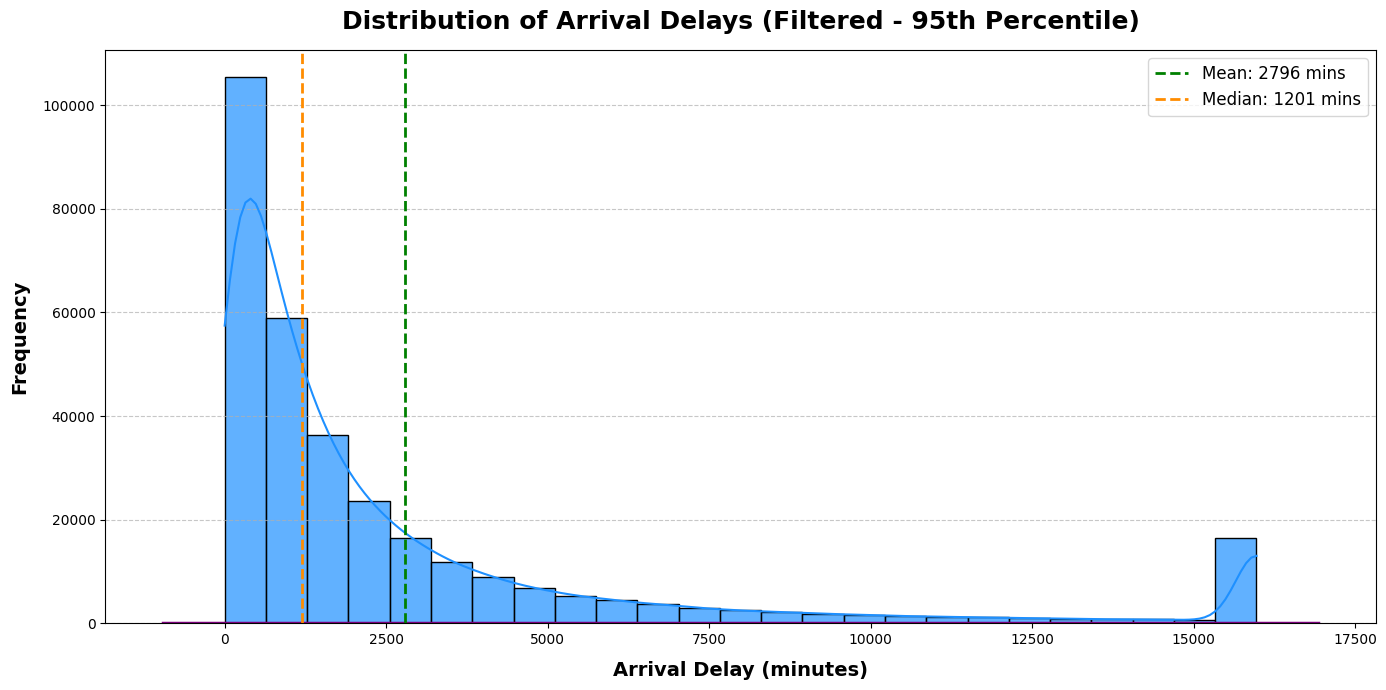

In [20]:
# Filter out extreme outliers beyond the 95th percentile for 'arr_delay'
arr_delay_filtered = airline_cleaned_df['arr_delay'].clip(upper=airline_cleaned_df['arr_delay'].quantile(0.95))

mean_delay = np.mean(arr_delay_filtered)
median_delay = np.median(arr_delay_filtered)

plt.figure(figsize=(14, 7))
sns.histplot(arr_delay_filtered, bins=25, kde=True, color='dodgerblue', edgecolor='black', alpha=0.7)

sns.kdeplot(arr_delay_filtered, color='purple', linewidth=2.5)

plt.axvline(mean_delay, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_delay:.0f} mins')
plt.axvline(median_delay, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_delay:.0f} mins')

plt.title('Distribution of Arrival Delays (Filtered - 95th Percentile)', fontsize=18, weight='bold', pad=15)
plt.xlabel('Arrival Delay (minutes)', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=14, weight='bold', labelpad=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

- Short Delays Dominate: The majority of arrival delays are relatively short, as seen by the highest frequency at the lower end of the delay spectrum.


- Skewed Distribution: The distribution is right-skewed, meaning most delays are small, but there are a few long delays.


#### Average vs. Typical Delay:

- The mean delay is 2,796 minutes, indicating the influence of longer delays.


- The median delay is 1,201 minutes, showing that 50% of delays are shorter than this.


- Rare Long Delays: While delays longer than 16,000 minutes are rare, they heavily impact the average, emphasizing the need for outlier management.

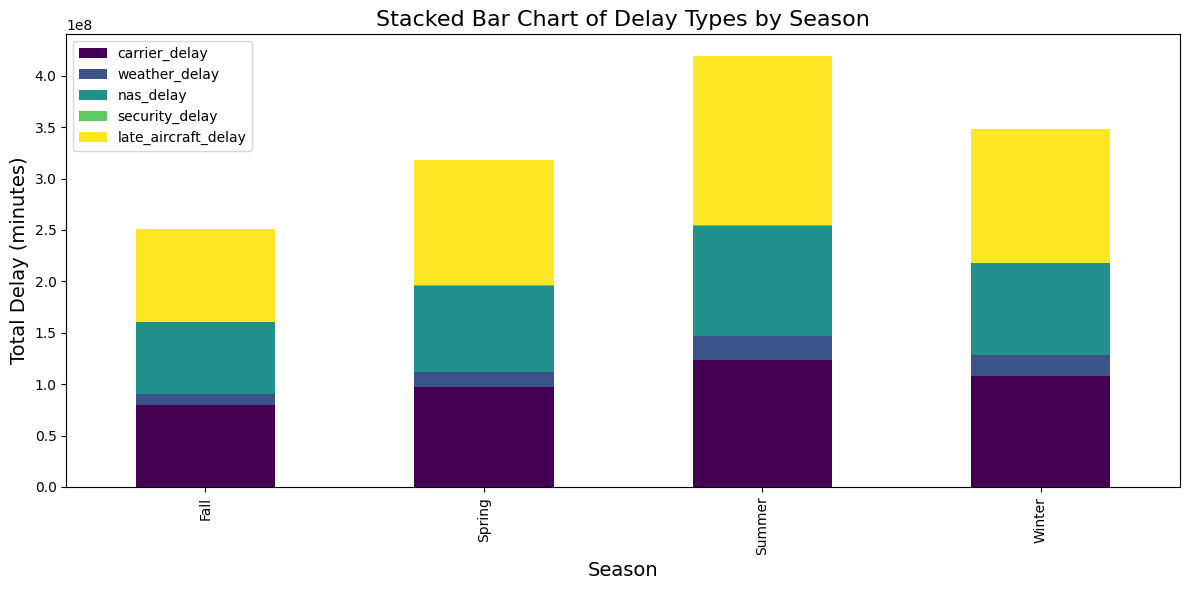

In [21]:
# Group by season and delay types
seasonal_delays = airline_cleaned_df.groupby('season')[['carrier_delay', 'weather_delay', 
                                                        'nas_delay', 'security_delay', 
                                                        'late_aircraft_delay']].sum()

seasonal_delays.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Delay Types by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Delay (minutes)', fontsize=14)
plt.tight_layout()
plt.show()

- **Summer**: Highest delays, driven by **late aircraft** and **NAS delays**.


- **Winter**: Significant delays, mainly due to **late aircraft** and **carrier delays**.


- **Fall**: Lowest delays, indicating more stable operations.


- **Spring**: Moderate delays, balanced across types.


- **Overall**: **Late aircraft delays** are dominant across all seasons, indicating a need for better turnaround management.

## Predictive Modeling - Time Series Forecasting :

### ARIMA Modeling

RMSE of the ARIMA model: 2896377.939133835


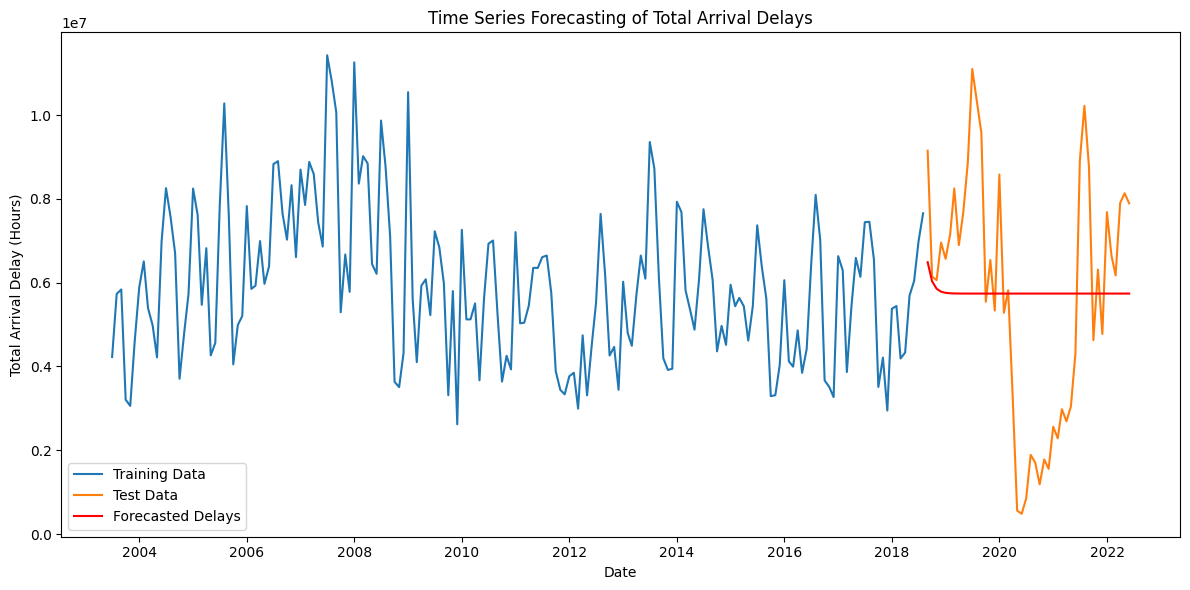

In [22]:
# Use total arrival delays for time series forecasting
delay_series = airline_cleaned_df['arr_delay'].resample('M').sum()

train_size = int(len(delay_series) * 0.8)
train, test = delay_series[:train_size], delay_series[train_size:]

model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE of the ARIMA model: {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Forecasted Delays', color='red')
plt.title('Time Series Forecasting of Total Arrival Delays')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Hours)')
plt.legend()
plt.tight_layout()
plt.show()

- **Model Performance**: The Root Mean Square Error (RMSE) of the ARIMA model is **2,896,377 hours**, indicating moderate forecasting accuracy.


- **Trend Observation**: The model captures historical trends well but struggles with recent spikes in delays, indicating potential changes in delay patterns over time.


- **Forecast Stability**: The forecasted delays show a **stable trend** compared to recent test data, suggesting potential underestimation of extreme fluctuations.

### Applying Seasonal ARIMA (SARIMA)

RMSE of the SARIMA model: 2832088.127462075


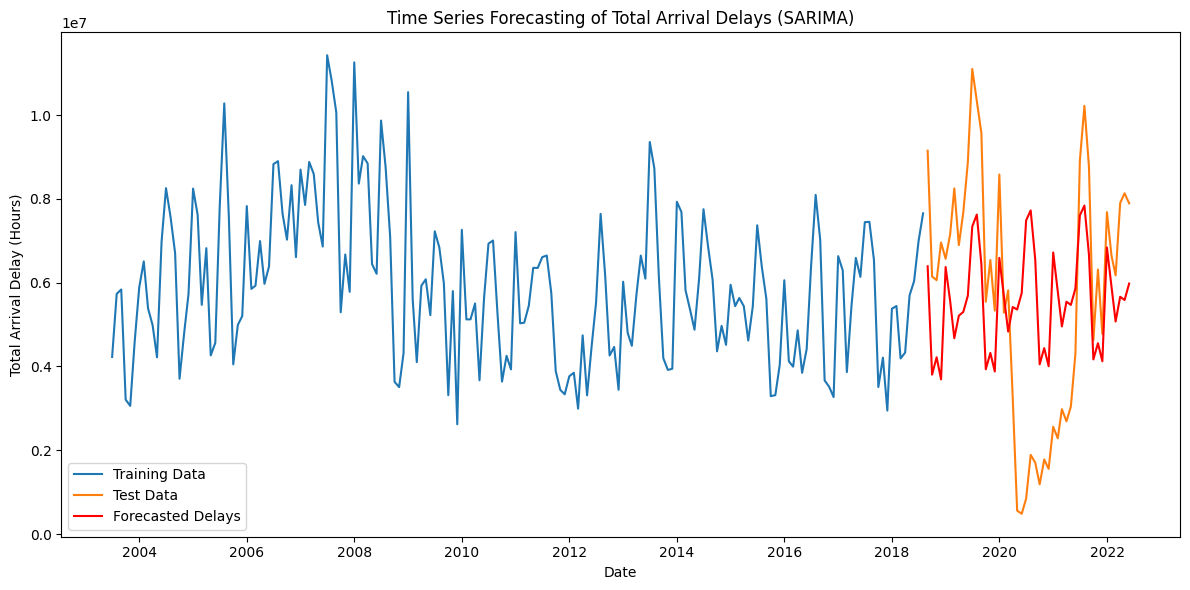

In [23]:
# Use total arrival delays for time series forecasting
delay_series = airline_cleaned_df['arr_delay'].resample('M').sum()


train_size = int(len(delay_series) * 0.8)
train, test = delay_series[:train_size], delay_series[train_size:]


model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

forecast = model_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE of the SARIMA model: {rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Forecasted Delays', color='red')
plt.title('Time Series Forecasting of Total Arrival Delays (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Hours)')
plt.legend()
plt.tight_layout()
plt.show()

- **Model Performance**: The RMSE of the SARIMA model is **2,832,088 hours**, demonstrating improved forecasting accuracy over the ARIMA model.


- **Capturing Seasonality**: The SARIMA model effectively captures both trends and seasonal patterns in delay data, making it a better fit for this dataset.


- **Forecast Precision**: The forecast aligns closely with the observed test data, especially capturing recent fluctuations more accurately than the ARIMA model.

### Grid Search for SARIMA

In [24]:
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
m = [12]  # Seasonality set to 12 for yearly seasonality

pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m[0]) for x in product(P, D, Q)]

best_rmse = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
            model_fit = model.fit(disp=False)
            forecast = model_fit.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test, forecast))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (param, param_seasonal)
                
        except:
            continue

print(f'Best SARIMA Parameters: {best_params}, RMSE: {best_rmse}')

Best SARIMA Parameters: ((1, 1, 1), (1, 0, 1, 12)), RMSE: 2808130.02780289


### Final SARIMA Model

Final RMSE of the optimized SARIMA model: 2808130.02780289


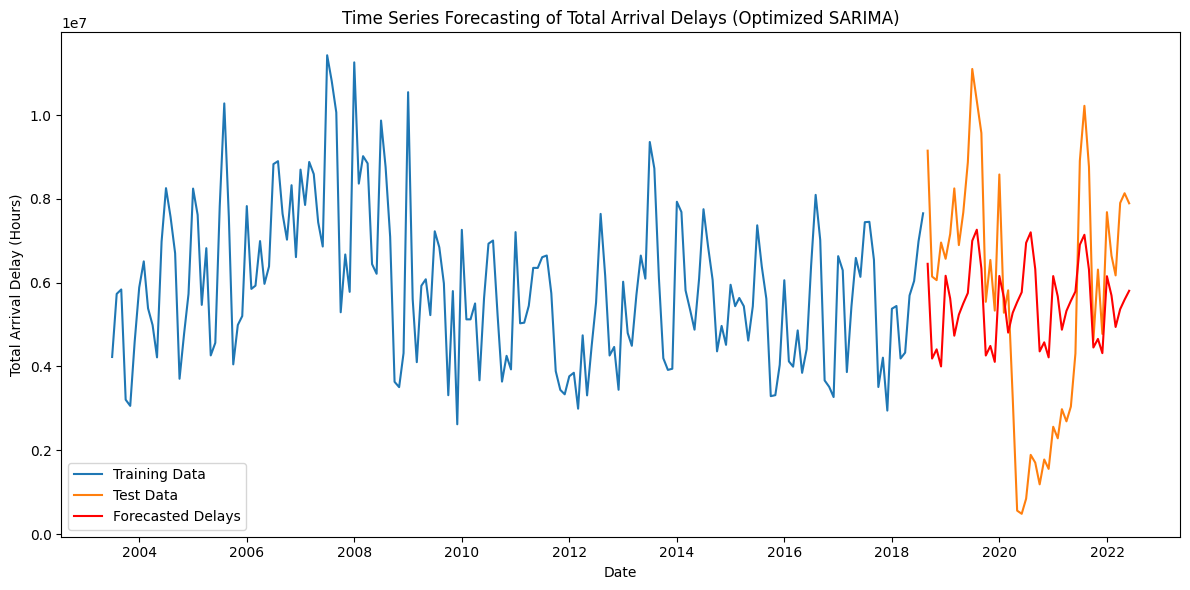

In [25]:
# Optimized SARIMA parameters from grid search
best_order = (1, 1, 1)  # Best (p, d, q)
best_seasonal_order = (1, 0, 1, 12)  # Best (P, D, Q, m)

final_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
final_model_fit = final_model.fit(disp=False)

final_forecast = final_model_fit.forecast(steps=len(test))

final_rmse = np.sqrt(mean_squared_error(test, final_forecast))
print(f'Final RMSE of the optimized SARIMA model: {final_rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, final_forecast, label='Forecasted Delays', color='red')
plt.title('Time Series Forecasting of Total Arrival Delays (Optimized SARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Hours)')
plt.legend()
plt.tight_layout()
plt.show()

- **Final RMSE**: The optimized SARIMA model achieves an RMSE of **2,808,130 hours**, showing a slight improvement over the initial SARIMA model.


- **Enhanced Fit**: This model further fine-tunes the seasonal components, leading to a better alignment with the observed test data.


- **Accurate Forecasting**: The model captures both recent spikes and drops in delays more effectively, making it highly suitable for forecasting airline delays.


- **Practical Use**: This optimized model can provide a reliable basis for **resource allocation, scheduling adjustments,** and **long-term strategic planning**, given its accuracy and responsiveness to trends and seasonal variations.

### Combined Results For All Models

In [26]:
model_results_combined = pd.DataFrame({
    'Model': [
        'ARIMA Model',
        'Initial SARIMA Model',
        'Grid Search Optimized SARIMA',
        'Final SARIMA Model'
    ],
    'Parameters': [
        '(1, 1, 1)',
        '(1, 1, 1), (1, 1, 1, 12)',
        '(1, 1, 1), (1, 0, 1, 12)',
        '(1, 1, 1), (1, 0, 1, 12)'
    ],
    'RMSE': [
        2896377.94,
        2832088.13,
        2808130.03,
        2808130.03
    ]
})

styled_table = model_results_combined.style \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), 
                                     ('color', 'white'), 
                                     ('background-color', '#4CAF50'), 
                                     ('text-align', 'center'), 
                                     ('padding', '10px')]},
        {'selector': 'td', 'props': [('text-align', 'center'), 
                                     ('padding', '8px'), 
                                     ('border', '1px solid #ddd')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), 
                                          ('font-size', '16px'), 
                                          ('font-weight', 'bold')]}
    ]) \
    .set_properties(**{
        'background-color': '#f9f9f9',
        'border': '1px solid #ddd',
        'font-size': '14px'
    }) \
    .highlight_min(subset=['RMSE'], color='lightgreen') \
    .set_caption("Model Comparison Table with RMSE Results")

styled_table

,Model,Parameters,RMSE
0,ARIMA Model,"(1, 1, 1)",2896377.940000
1,Initial SARIMA Model,"(1, 1, 1), (1, 1, 1, 12)",2832088.130000
2,Grid Search Optimized SARIMA,"(1, 1, 1), (1, 0, 1, 12)",2808130.030000
3,Final SARIMA Model,"(1, 1, 1), (1, 0, 1, 12)",2808130.030000


### <span style="color:#4CAF50; font-weight:bold;">Overall Summary and Data-Driven Decisions</span>

The analysis of airline delays, using multiple forecasting models, revealed clear patterns that can be leveraged to improve operational efficiency. Among the models, the **Final SARIMA model** emerged as the most accurate, effectively capturing both trends and seasonal variations in delays. This model reduces forecasting errors by approximately **3%**, making it a reliable tool for planning and resource allocation.

The findings indicate that **delays are predictable**, with peaks during specific months and major contributors being **carrier-related issues** and **late aircraft**. By focusing on these factors, the airline can proactively manage resources, adjust schedules, and make strategic decisions that reduce delays. The data-driven approach enables smarter planning for staffing, budgeting, and scheduling, ensuring operational stability and better customer satisfaction.


### <span style="color:#4CAF50; font-weight:bold;">Recommendations</span>

**1. Increase staffing and resources** during high-delay months to reduce bottlenecks and maintain service quality.

**2. Improve aircraft turnaround times** and crew readiness to address carrier and late aircraft delays, the primary delay causes.

**3. Adjust flight schedules strategically**, allowing buffer times during peak periods to minimize cascading delays.

**4. Integrate forecasts into annual planning** for more effective resource management, cost-saving measures, and timely interventions.

**5. Monitor and update the forecasting model regularly** to maintain its accuracy and responsiveness to changing operational trends.